In [123]:
%pip install rdkit

In [124]:
pip install chembl_webresource_client

In [125]:
import pandas as pd
from chembl_webresource_client.new_client import new_client

In [126]:
target = new_client.target
target_query = target.search('primary progressive multiple sclerosis')
targets = pd.DataFrame.from_dict(target_query)
targets
pd.set_option('display.max_rows', None)
display(targets)
pd.reset_option('display.max_rows')

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],Homo sapiens,Myeloid differentiation primary response prote...,17.00,False,CHEMBL5919,"[{'accession': 'Q99836', 'component_descriptio...",SINGLE PROTEIN,9606.00
1,[],Mus musculus,Myeloid differentiation primary response prote...,17.00,False,CHEMBL4523204,"[{'accession': 'P22366', 'component_descriptio...",SINGLE PROTEIN,10090.00
2,[],Pisum sativum,Amine oxidase,16.00,False,CHEMBL5534,"[{'accession': 'Q43077', 'component_descriptio...",SINGLE PROTEIN,3888.00
3,[],Pichia angusta,"Amine oxidase, copper containing",15.00,False,CHEMBL5020,"[{'accession': 'P12807', 'component_descriptio...",SINGLE PROTEIN,870730.00
4,[],Mus musculus,Multiple PDZ domain protein,15.00,False,CHEMBL2176783,"[{'accession': 'Q8VBX6', 'component_descriptio...",SINGLE PROTEIN,10090.00
5,[],Homo sapiens,Epidermal growth factor-like protein 7,14.00,False,CHEMBL3712972,"[{'accession': 'Q9UHF1', 'component_descriptio...",SINGLE PROTEIN,9606.00
6,[],Homo sapiens,CD2-associated protein,14.00,False,CHEMBL5465369,"[{'accession': 'Q9Y5K6', 'component_descriptio...",SINGLE PROTEIN,9606.00
7,[],Mus musculus,TLR4-MyD88,14.00,False,CHEMBL5483003,"[{'accession': 'Q9QUK6', 'component_descriptio...",PROTEIN-PROTEIN INTERACTION,10090.00
8,[],Saccharomyces cerevisiae S288c,Pleiotropic ABC efflux transporter of multiple...,12.00,False,CHEMBL1697658,"[{'accession': 'P33302', 'component_descriptio...",SINGLE PROTEIN,559292.00
9,[],Homo sapiens,"Acylglycerol kinase, mitochondrial",12.00,False,CHEMBL2417354,"[{'accession': 'Q53H12', 'component_descriptio...",SINGLE PROTEIN,9606.00


Here is a database of all the known drug targets of primary progressive multiple sclerosis present in ChEMBL at the moment.

In [127]:
selected_target = targets.target_chembl_id[45]
selected_target

'CHEMBL4899'

Picking MAP3K8 (CHEMBL4899) as my drug target.

In [128]:
activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target, standard_type="IC50")

Here I am getting all of the drug-like molecules that have been tested against MAP3K8 (my drug target of choice for this project) along with their IC50 value.

IC50 - The concentration of an inhibitor when the drug target response is reduced by half. In other words, the potency of the drug-like molecule acting on MAP3K8. The lower this value = The more potent the drug is.

In [129]:
df = pd.DataFrame.from_dict(res)

In [130]:
df = pd.DataFrame.from_dict(res)
df.head(3)

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,1658869,[],CHEMBL860389,Inhibitory activity against human Tpl2 kinase ...,F,None,None,BAO_0000190,...,Homo sapiens,Mitogen-activated protein kinase kinase kinase 8,9606,None,None,IC50,nM,UO_0000065,None,1200.0
1,None,None,1658870,[],CHEMBL860389,Inhibitory activity against human Tpl2 kinase ...,F,None,None,BAO_0000190,...,Homo sapiens,Mitogen-activated protein kinase kinase kinase 8,9606,None,None,IC50,nM,UO_0000065,None,3565.0
2,None,None,1658871,[],CHEMBL860389,Inhibitory activity against human Tpl2 kinase ...,F,None,None,BAO_0000190,...,Homo sapiens,Mitogen-activated protein kinase kinase kinase 8,9606,None,None,IC50,nM,UO_0000065,None,40000.0


In [131]:
df.standard_type.unique()

array(['IC50'], dtype=object)

Checking to see if only the IC50 measurements are present from the dataframe.

In [132]:
df.to_csv('bioactivity_data.csv', index=False)

In [133]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [134]:
mkdir "/content/gdrive/My Drive/Colab Notebooks/data2"

mkdir: cannot create directory ‘/content/gdrive/My Drive/Colab Notebooks/data2’: File exists


In [135]:
cp bioactivity_data.csv "/content/gdrive/My Drive/Colab Notebooks/data"

In [136]:
ls -l "/content/gdrive/My Drive/Colab Notebooks/data"

-rw------- 1 root root 180468 Sep 16 16:34 '/content/gdrive/My Drive/Colab Notebooks/data'


In [137]:
ls

bioactivity_data_2class_pIC50.csv
bioactivity_data.csv
bioactivity_preprocessed_data.csv
descriptors_output.csv
gdrive/
mannwhitneyu_LogP.csv
mannwhitneyu_MW.csv
mannwhitneyu_NumHAcceptors.csv
mannwhitneyu_NumHDonors.csv
mannwhitneyu_pIC50.csv
MAPKKK8_bioactivity_data_3class_pIC50_pubchem_fp.csv
molecule.smi
molecules.smi
plot_bioactivity_class.pdf
plot_ic50.pdf
plot_LogP.pdf
plot_MW.pdf
plot_MW_vs_LogP.pdf
plot_NumHAcceptors.pdf
plot_NumHDonors.pdf
results.zip
sample_data/


In [138]:
import pandas as pd


df_bioactivity = pd.read_csv('bioactivity_data.csv')


display(df_bioactivity.head())

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,NaN,NaN,1658869,[],CHEMBL860389,Inhibitory activity against human Tpl2 kinase ...,F,NaN,NaN,BAO_0000190,...,Homo sapiens,Mitogen-activated protein kinase kinase kinase 8,9606,NaN,NaN,IC50,nM,UO_0000065,NaN,1200.00
1,NaN,NaN,1658870,[],CHEMBL860389,Inhibitory activity against human Tpl2 kinase ...,F,NaN,NaN,BAO_0000190,...,Homo sapiens,Mitogen-activated protein kinase kinase kinase 8,9606,NaN,NaN,IC50,nM,UO_0000065,NaN,3565.00
2,NaN,NaN,1658871,[],CHEMBL860389,Inhibitory activity against human Tpl2 kinase ...,F,NaN,NaN,BAO_0000190,...,Homo sapiens,Mitogen-activated protein kinase kinase kinase 8,9606,NaN,NaN,IC50,nM,UO_0000065,NaN,40000.00
3,NaN,NaN,1658872,[],CHEMBL860389,Inhibitory activity against human Tpl2 kinase ...,F,NaN,NaN,BAO_0000190,...,Homo sapiens,Mitogen-activated protein kinase kinase kinase 8,9606,NaN,NaN,IC50,nM,UO_0000065,NaN,40000.00
4,NaN,NaN,1658873,[],CHEMBL860389,Inhibitory activity against human Tpl2 kinase ...,F,NaN,NaN,BAO_0000190,...,Homo sapiens,Mitogen-activated protein kinase kinase kinase 8,9606,NaN,NaN,IC50,nM,UO_0000065,NaN,40000.00


In [139]:
df2 = df[df.standard_value.notna()]
df2

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,1658869,[],CHEMBL860389,Inhibitory activity against human Tpl2 kinase ...,F,None,None,BAO_0000190,...,Homo sapiens,Mitogen-activated protein kinase kinase kinase 8,9606,None,None,IC50,nM,UO_0000065,None,1200.0
1,None,None,1658870,[],CHEMBL860389,Inhibitory activity against human Tpl2 kinase ...,F,None,None,BAO_0000190,...,Homo sapiens,Mitogen-activated protein kinase kinase kinase 8,9606,None,None,IC50,nM,UO_0000065,None,3565.0
2,None,None,1658871,[],CHEMBL860389,Inhibitory activity against human Tpl2 kinase ...,F,None,None,BAO_0000190,...,Homo sapiens,Mitogen-activated protein kinase kinase kinase 8,9606,None,None,IC50,nM,UO_0000065,None,40000.0
3,None,None,1658872,[],CHEMBL860389,Inhibitory activity against human Tpl2 kinase ...,F,None,None,BAO_0000190,...,Homo sapiens,Mitogen-activated protein kinase kinase kinase 8,9606,None,None,IC50,nM,UO_0000065,None,40000.0
4,None,None,1658873,[],CHEMBL860389,Inhibitory activity against human Tpl2 kinase ...,F,None,None,BAO_0000190,...,Homo sapiens,Mitogen-activated protein kinase kinase kinase 8,9606,None,None,IC50,nM,UO_0000065,None,40000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25070178,[],CHEMBL5252718,Inhibition of MAP3K8 (unknown origin),B,None,None,BAO_0000190,...,Homo sapiens,Mitogen-activated protein kinase kinase kinase 8,9606,None,None,IC50,nM,UO_0000065,None,1120.0
357,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25070179,[],CHEMBL5252718,Inhibition of MAP3K8 (unknown origin),B,None,None,BAO_0000190,...,Homo sapiens,Mitogen-activated protein kinase kinase kinase 8,9606,None,None,IC50,nM,UO_0000065,None,410.0
358,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25070180,[],CHEMBL5252718,Inhibition of MAP3K8 (unknown origin),B,None,None,BAO_0000190,...,Homo sapiens,Mitogen-activated protein kinase kinase kinase 8,9606,None,None,IC50,nM,UO_0000065,None,150.0
359,None,None,25786810,"[{'comments': None, 'relation': None, 'result_...",CHEMBL5473644,Selectivity interaction (Kinase panel (Enzymat...,B,None,None,BAO_0000190,...,Homo sapiens,Mitogen-activated protein kinase kinase kinase 8,9606,None,None,IC50,uM,UO_0000065,None,10.0


In [140]:
bioactivity_class = []
for i in df2.standard_value:
  if float(i) >= 10000:
    bioactivity_class.append("inactive")
  elif float(i) <= 1000:
    bioactivity_class.append("active")
  else:
    bioactivity_class.append("intermediate")

This converts continuous values of IC50 into categories of activity. This is so the drug-like molecules in this dataframe acting on MAP3K8 can be separated into 'good' inhibitors or 'bad' inhibitors. Intermediate inhibitors will be gotten rid of for simplicity of the model.

In [141]:
mol_cid = []
for i in df2.molecule_chembl_id:
  mol_cid.append(i)

In [142]:
mol_cid

['CHEMBL197538',
 'CHEMBL425213',
 'CHEMBL199000',
 'CHEMBL198647',
 'CHEMBL196771',
 'CHEMBL197382',
 'CHEMBL199230',
 'CHEMBL370336',
 'CHEMBL196919',
 'CHEMBL200247',
 'CHEMBL200381',
 'CHEMBL370655',
 'CHEMBL198581',
 'CHEMBL198905',
 'CHEMBL198904',
 'CHEMBL197164',
 'CHEMBL197006',
 'CHEMBL196959',
 'CHEMBL198577',
 'CHEMBL371532',
 'CHEMBL196918',
 'CHEMBL198739',
 'CHEMBL371095',
 'CHEMBL199210',
 'CHEMBL371658',
 'CHEMBL198022',
 'CHEMBL371239',
 'CHEMBL199383',
 'CHEMBL197923',
 'CHEMBL200499',
 'CHEMBL199755',
 'CHEMBL199528',
 'CHEMBL373001',
 'CHEMBL199951',
 'CHEMBL200657',
 'CHEMBL371242',
 'CHEMBL197603',
 'CHEMBL197538',
 'CHEMBL374482',
 'CHEMBL222882',
 'CHEMBL223587',
 'CHEMBL223877',
 'CHEMBL374258',
 'CHEMBL221006',
 'CHEMBL374210',
 'CHEMBL219628',
 'CHEMBL223088',
 'CHEMBL375813',
 'CHEMBL374241',
 'CHEMBL219682',
 'CHEMBL221221',
 'CHEMBL426886',
 'CHEMBL426924',
 'CHEMBL220685',
 'CHEMBL374071',
 'CHEMBL222666',
 'CHEMBL220037',
 'CHEMBL220233',
 'CHEMBL221269

In [143]:
canonical_smiles = []
for i in df2.canonical_smiles:
  canonical_smiles.append(i)

In [144]:
canonical_smiles

['N#Cc1cnc2cnc(NCCN3CCOCC3)cc2c1Nc1ccc(F)c(Cl)c1',
 'N#Cc1cnc2cnc(NCCCN3CCCC3)cc2c1Nc1ccc(F)c(Cl)c1',
 'N#Cc1cnc2cnc(NC3CCCC3)cc2c1Nc1ccc(F)c(Cl)c1',
 'CN(Cc1ccccc1)c1cc2c(Nc3ccc(F)c(Cl)c3)c(C#N)cnc2cn1',
 'CC[C@H](Nc1cc2c(Nc3ccc(F)c(Cl)c3)c(C#N)cnc2cn1)c1ccccc1',
 'CC[C@@H](Nc1cc2c(Nc3ccc(F)c(Cl)c3)c(C#N)cnc2cn1)c1ccccc1',
 'C[C@@H](Nc1cc2c(Nc3ccc(F)c(Cl)c3)c(C#N)cnc2cn1)c1ccccc1',
 'C[C@H](Nc1cc2c(Nc3ccc(F)c(Cl)c3)c(C#N)cnc2cn1)c1ccccc1',
 'N#Cc1cnc2cnc(NC(CN3CCOCC3)c3ccccc3)cc2c1Nc1ccc(F)c(Cl)c1',
 'N#Cc1cnc2cnc(NCc3ccccc3)cc2c1Nc1ccc(F)c(Cl)c1',
 'N#Cc1cnc2cnc(NCc3cccnc3)cc2c1Nc1ccc(F)c(Cl)c1',
 'CN1CCN(CCCNc2cc3c(Nc4ccc(F)c(Cl)c4)c(C#N)cnc3cn2)CC1',
 'N#Cc1cnc2cnc(NCCCN3CCOCC3)cc2c1Nc1ccc(F)c(Cl)c1',
 'N#Cc1cnc2cnc(NCCN3CCOCC3)cc2c1Nc1cc(Cl)cc(Cl)c1',
 'Cc1c(Br)cccc1Nc1c(C#N)cnc2cnc(NCCN3CCOCC3)cc12',
 'N#Cc1cnc2cnc(NCCN3CCOCC3)cc2c1Nc1ccc(Cl)c(Cl)c1',
 'N#Cc1cnc2cnc(NCCN3CCOCC3)cc2c1Nc1ccc(Cl)cc1F',
 'N#Cc1cnc2cnc(NCCN3CCOCC3)cc2c1Nc1ccc(Cl)cc1',
 'N#Cc1cnc2cnc(NCCN3CCOCC3)cc2c1N

In [145]:
standard_value = []
for i in df2.standard_value:
  standard_value.append(i)

In [146]:
data_tuples = list(zip(mol_cid, canonical_smiles, bioactivity_class, standard_value))
df3 = pd.DataFrame( data_tuples,  columns=['molecule_chembl_id', 'canonical_smiles', 'bioactivity_class', 'standard_value'])

In [147]:
df3

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value
0,CHEMBL197538,N#Cc1cnc2cnc(NCCN3CCOCC3)cc2c1Nc1ccc(F)c(Cl)c1,intermediate,1200.0
1,CHEMBL425213,N#Cc1cnc2cnc(NCCCN3CCCC3)cc2c1Nc1ccc(F)c(Cl)c1,intermediate,3565.0
2,CHEMBL199000,N#Cc1cnc2cnc(NC3CCCC3)cc2c1Nc1ccc(F)c(Cl)c1,inactive,40000.0
3,CHEMBL198647,CN(Cc1ccccc1)c1cc2c(Nc3ccc(F)c(Cl)c3)c(C#N)cnc...,inactive,40000.0
4,CHEMBL196771,CC[C@H](Nc1cc2c(Nc3ccc(F)c(Cl)c3)c(C#N)cnc2cn1...,inactive,40000.0
...,...,...,...,...
355,CHEMBL497151,O=c1nc(-c2cc3c(Oc4ccc(I)cc4)cncc3s2)[nH]o1,intermediate,1120.0
356,CHEMBL498385,Ic1ccc(Oc2cncc3sc(-c4nn[nH]n4)cc23)cc1,active,410.0
357,CHEMBL491228,NC(=O)c1ccc(-c2ccc(Oc3cncc4sc(-c5nn[nH]n5)cc34...,active,150.0
358,CHEMBL1852688,CCN1CCN(c2ccc(Nc3cc(N(C)C(=O)Nc4c(Cl)c(OC)cc(O...,inactive,10000.0


Combining all of the previous lists just made into one dataframe. Canonical_smiles refers to SMILES strings. This is a way to represent drug molecule functional groups into something that can be interpreted later.

In [148]:
pd.concat([df3,pd.Series(bioactivity_class)], axis=1)

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value,0
0,CHEMBL197538,N#Cc1cnc2cnc(NCCN3CCOCC3)cc2c1Nc1ccc(F)c(Cl)c1,intermediate,1200.0,intermediate
1,CHEMBL425213,N#Cc1cnc2cnc(NCCCN3CCCC3)cc2c1Nc1ccc(F)c(Cl)c1,intermediate,3565.0,intermediate
2,CHEMBL199000,N#Cc1cnc2cnc(NC3CCCC3)cc2c1Nc1ccc(F)c(Cl)c1,inactive,40000.0,inactive
3,CHEMBL198647,CN(Cc1ccccc1)c1cc2c(Nc3ccc(F)c(Cl)c3)c(C#N)cnc...,inactive,40000.0,inactive
4,CHEMBL196771,CC[C@H](Nc1cc2c(Nc3ccc(F)c(Cl)c3)c(C#N)cnc2cn1...,inactive,40000.0,inactive
...,...,...,...,...,...
355,CHEMBL497151,O=c1nc(-c2cc3c(Oc4ccc(I)cc4)cncc3s2)[nH]o1,intermediate,1120.0,intermediate
356,CHEMBL498385,Ic1ccc(Oc2cncc3sc(-c4nn[nH]n4)cc23)cc1,active,410.0,active
357,CHEMBL491228,NC(=O)c1ccc(-c2ccc(Oc3cncc4sc(-c5nn[nH]n5)cc34...,active,150.0,active
358,CHEMBL1852688,CCN1CCN(c2ccc(Nc3cc(N(C)C(=O)Nc4c(Cl)c(OC)cc(O...,inactive,10000.0,inactive


In [149]:
df3.to_csv('bioactivity_preprocessed_data.csv', index=False)

In [150]:
ls -l

total 3276
-rw-r--r-- 1 root root   39186 Sep 16 12:07 bioactivity_data_2class_pIC50.csv
-rw-r--r-- 1 root root  180468 Sep 16 16:33 bioactivity_data.csv
-rw-r--r-- 1 root root   29421 Sep 16 16:34 bioactivity_preprocessed_data.csv
-rw-r--r-- 1 root root  535651 Sep 16 12:10 descriptors_output.csv
drwx------ 5 root root    4096 Sep 16 16:34 gdrive/
-rw-r--r-- 1 root root     124 Sep 16 12:07 mannwhitneyu_LogP.csv
-rw-r--r-- 1 root root     121 Sep 16 12:07 mannwhitneyu_MW.csv
-rw-r--r-- 1 root root     132 Sep 16 12:07 mannwhitneyu_NumHAcceptors.csv
-rw-r--r-- 1 root root     130 Sep 16 12:07 mannwhitneyu_NumHDonors.csv
-rw-r--r-- 1 root root     125 Sep 16 12:07 mannwhitneyu_pIC50.csv
-rw-r--r-- 1 root root 1101400 Sep 16 12:10 MAPKKK8_bioactivity_data_3class_pIC50_pubchem_fp.csv
-rw-r--r-- 1 root root   19581 Sep 16 12:07 molecule.smi
-rw-r--r-- 1 root root 1090039 Sep 16 15:44 molecules.smi
-rw-r--r-- 1 root root   13520 Sep 16 12:07 plot_bioactivity_class.pdf
-rw-r--r-- 1 root root

In [151]:
cp bioactivity_preprocessed_data.csv "/content/gdrive/My Drive/Colab Notebooks/data"

In [152]:
ls "/content/gdrive/My Drive/Colab Notebooks/data"

'/content/gdrive/My Drive/Colab Notebooks/data'


In [153]:
import pandas as pd

In [154]:
df = pd.read_csv('bioactivity_preprocessed_data.csv')

In [155]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

In [156]:
def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem)
        moldata.append(mol)

    baseData= np.arange(1,1)
    i=0
    for mol in moldata:

        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)

        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])

        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1

    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)

    return descriptors

The lipinski function from RdKit will take the SMILES strings from our dataframe and converts it into an 'RdKit Molecule Object'. This then allows the calculation of properties from 'Lipinski's Rule of 5'

__Lipinski's Rule of 5__

Used as a guideline to evaluate the 'druglikeness' of a molecule.

An orally active drug will not violate more than one of these rules:

- No more than 5 hydrogen bond donors
- No more than 10 hydrogen bond acceptors
- A molecular mass of <500 daltons
- A lipophilicity vs. hydrophilicity relationship (ClogP) of < or = 5

In [157]:
df_lipinski = lipinski(df.canonical_smiles)

In [158]:
df

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value
0,CHEMBL197538,N#Cc1cnc2cnc(NCCN3CCOCC3)cc2c1Nc1ccc(F)c(Cl)c1,intermediate,1200.00
1,CHEMBL425213,N#Cc1cnc2cnc(NCCCN3CCCC3)cc2c1Nc1ccc(F)c(Cl)c1,intermediate,3565.00
2,CHEMBL199000,N#Cc1cnc2cnc(NC3CCCC3)cc2c1Nc1ccc(F)c(Cl)c1,inactive,40000.00
3,CHEMBL198647,CN(Cc1ccccc1)c1cc2c(Nc3ccc(F)c(Cl)c3)c(C#N)cnc...,inactive,40000.00
4,CHEMBL196771,CC[C@H](Nc1cc2c(Nc3ccc(F)c(Cl)c3)c(C#N)cnc2cn1...,inactive,40000.00
...,...,...,...,...
355,CHEMBL497151,O=c1nc(-c2cc3c(Oc4ccc(I)cc4)cncc3s2)[nH]o1,intermediate,1120.00
356,CHEMBL498385,Ic1ccc(Oc2cncc3sc(-c4nn[nH]n4)cc23)cc1,active,410.00
357,CHEMBL491228,NC(=O)c1ccc(-c2ccc(Oc3cncc4sc(-c5nn[nH]n5)cc34...,active,150.00
358,CHEMBL1852688,CCN1CCN(c2ccc(Nc3cc(N(C)C(=O)Nc4c(Cl)c(OC)cc(O...,inactive,10000.00


In [159]:
df_combined = pd.concat([df,df_lipinski], axis=1)

In [160]:
df_combined

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL197538,N#Cc1cnc2cnc(NCCN3CCOCC3)cc2c1Nc1ccc(F)c(Cl)c1,intermediate,1200.00,426.88,3.78,2.00,7.00
1,CHEMBL425213,N#Cc1cnc2cnc(NCCCN3CCCC3)cc2c1Nc1ccc(F)c(Cl)c1,intermediate,3565.00,424.91,4.94,2.00,6.00
2,CHEMBL199000,N#Cc1cnc2cnc(NC3CCCC3)cc2c1Nc1ccc(F)c(Cl)c1,inactive,40000.00,381.84,5.39,2.00,5.00
3,CHEMBL198647,CN(Cc1ccccc1)c1cc2c(Nc3ccc(F)c(Cl)c3)c(C#N)cnc...,inactive,40000.00,417.88,5.67,1.00,5.00
4,CHEMBL196771,CC[C@H](Nc1cc2c(Nc3ccc(F)c(Cl)c3)c(C#N)cnc2cn1...,inactive,40000.00,431.90,6.60,2.00,5.00
...,...,...,...,...,...,...,...,...
355,CHEMBL497151,O=c1nc(-c2cc3c(Oc4ccc(I)cc4)cncc3s2)[nH]o1,intermediate,1120.00,437.22,4.04,1.00,6.00
356,CHEMBL498385,Ic1ccc(Oc2cncc3sc(-c4nn[nH]n4)cc23)cc1,active,410.00,421.22,3.87,1.00,6.00
357,CHEMBL491228,NC(=O)c1ccc(-c2ccc(Oc3cncc4sc(-c5nn[nH]n5)cc34...,active,150.00,414.45,4.03,2.00,7.00
358,CHEMBL1852688,CCN1CCN(c2ccc(Nc3cc(N(C)C(=O)Nc4c(Cl)c(OC)cc(O...,inactive,10000.00,560.49,5.35,2.00,8.00


In [161]:
import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9)
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', axis=1)

    return x

Converting IC50 to -log(IC50).

In [162]:
df_combined.standard_value.describe()

,standard_value
count,360.00
mean,10996.55
std,22666.13
min,1.60
25%,57.50
50%,575.00
75%,10000.00
max,100000.00


In [163]:
-np.log10( (10**-9)* 100000000 )

np.float64(1.0)

In [164]:
-np.log10( (10**-9)* 10000000000 )

np.float64(-1.0)

In [165]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000.0:
          i = 100000.0
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', axis=1)

    return x

In [166]:
df_norm = norm_value(df_combined)
df_norm

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL197538,N#Cc1cnc2cnc(NCCN3CCOCC3)cc2c1Nc1ccc(F)c(Cl)c1,intermediate,426.88,3.78,2.00,7.00,1200.00
1,CHEMBL425213,N#Cc1cnc2cnc(NCCCN3CCCC3)cc2c1Nc1ccc(F)c(Cl)c1,intermediate,424.91,4.94,2.00,6.00,3565.00
2,CHEMBL199000,N#Cc1cnc2cnc(NC3CCCC3)cc2c1Nc1ccc(F)c(Cl)c1,inactive,381.84,5.39,2.00,5.00,40000.00
3,CHEMBL198647,CN(Cc1ccccc1)c1cc2c(Nc3ccc(F)c(Cl)c3)c(C#N)cnc...,inactive,417.88,5.67,1.00,5.00,40000.00
4,CHEMBL196771,CC[C@H](Nc1cc2c(Nc3ccc(F)c(Cl)c3)c(C#N)cnc2cn1...,inactive,431.90,6.60,2.00,5.00,40000.00
...,...,...,...,...,...,...,...,...
355,CHEMBL497151,O=c1nc(-c2cc3c(Oc4ccc(I)cc4)cncc3s2)[nH]o1,intermediate,437.22,4.04,1.00,6.00,1120.00
356,CHEMBL498385,Ic1ccc(Oc2cncc3sc(-c4nn[nH]n4)cc23)cc1,active,421.22,3.87,1.00,6.00,410.00
357,CHEMBL491228,NC(=O)c1ccc(-c2ccc(Oc3cncc4sc(-c5nn[nH]n5)cc34...,active,414.45,4.03,2.00,7.00,150.00
358,CHEMBL1852688,CCN1CCN(c2ccc(Nc3cc(N(C)C(=O)Nc4c(Cl)c(OC)cc(O...,inactive,560.49,5.35,2.00,8.00,10000.00


In [167]:
df_norm.standard_value_norm.describe()

,standard_value_norm
count,360.00
mean,10996.55
std,22666.13
min,1.60
25%,57.50
50%,575.00
75%,10000.00
max,100000.00


In [168]:
df_final = pIC50(df_norm)
df_final

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL197538,N#Cc1cnc2cnc(NCCN3CCOCC3)cc2c1Nc1ccc(F)c(Cl)c1,intermediate,426.88,3.78,2.00,7.00,5.92
1,CHEMBL425213,N#Cc1cnc2cnc(NCCCN3CCCC3)cc2c1Nc1ccc(F)c(Cl)c1,intermediate,424.91,4.94,2.00,6.00,5.45
2,CHEMBL199000,N#Cc1cnc2cnc(NC3CCCC3)cc2c1Nc1ccc(F)c(Cl)c1,inactive,381.84,5.39,2.00,5.00,4.40
3,CHEMBL198647,CN(Cc1ccccc1)c1cc2c(Nc3ccc(F)c(Cl)c3)c(C#N)cnc...,inactive,417.88,5.67,1.00,5.00,4.40
4,CHEMBL196771,CC[C@H](Nc1cc2c(Nc3ccc(F)c(Cl)c3)c(C#N)cnc2cn1...,inactive,431.90,6.60,2.00,5.00,4.40
...,...,...,...,...,...,...,...,...
355,CHEMBL497151,O=c1nc(-c2cc3c(Oc4ccc(I)cc4)cncc3s2)[nH]o1,intermediate,437.22,4.04,1.00,6.00,5.95
356,CHEMBL498385,Ic1ccc(Oc2cncc3sc(-c4nn[nH]n4)cc23)cc1,active,421.22,3.87,1.00,6.00,6.39
357,CHEMBL491228,NC(=O)c1ccc(-c2ccc(Oc3cncc4sc(-c5nn[nH]n5)cc34...,active,414.45,4.03,2.00,7.00,6.82
358,CHEMBL1852688,CCN1CCN(c2ccc(Nc3cc(N(C)C(=O)Nc4c(Cl)c(OC)cc(O...,inactive,560.49,5.35,2.00,8.00,5.00


In [169]:
df_final.pIC50.describe()

,pIC50
count,360.00
mean,6.18
std,1.31
min,4.00
25%,5.00
50%,6.24
75%,7.24
max,8.80


In [170]:
df_2class = df_final[df_final.bioactivity_class != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
2,CHEMBL199000,N#Cc1cnc2cnc(NC3CCCC3)cc2c1Nc1ccc(F)c(Cl)c1,inactive,381.84,5.39,2.00,5.00,4.40
3,CHEMBL198647,CN(Cc1ccccc1)c1cc2c(Nc3ccc(F)c(Cl)c3)c(C#N)cnc...,inactive,417.88,5.67,1.00,5.00,4.40
4,CHEMBL196771,CC[C@H](Nc1cc2c(Nc3ccc(F)c(Cl)c3)c(C#N)cnc2cn1...,inactive,431.90,6.60,2.00,5.00,4.40
5,CHEMBL197382,CC[C@@H](Nc1cc2c(Nc3ccc(F)c(Cl)c3)c(C#N)cnc2cn...,active,431.90,6.60,2.00,5.00,6.38
6,CHEMBL199230,C[C@@H](Nc1cc2c(Nc3ccc(F)c(Cl)c3)c(C#N)cnc2cn1...,active,417.88,6.21,2.00,5.00,7.92
...,...,...,...,...,...,...,...,...
354,CHEMBL4634634,C[C@@H]1C[C@H]1C(=O)N1CCN(c2cnc(C#N)c(-c3cnn(C...,inactive,365.44,1.44,0.00,7.00,4.00
356,CHEMBL498385,Ic1ccc(Oc2cncc3sc(-c4nn[nH]n4)cc23)cc1,active,421.22,3.87,1.00,6.00,6.39
357,CHEMBL491228,NC(=O)c1ccc(-c2ccc(Oc3cncc4sc(-c5nn[nH]n5)cc34...,active,414.45,4.03,2.00,7.00,6.82
358,CHEMBL1852688,CCN1CCN(c2ccc(Nc3cc(N(C)C(=O)Nc4c(Cl)c(OC)cc(O...,inactive,560.49,5.35,2.00,8.00,5.00


Dropping intermediate performing drug-like molecules.

In [171]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

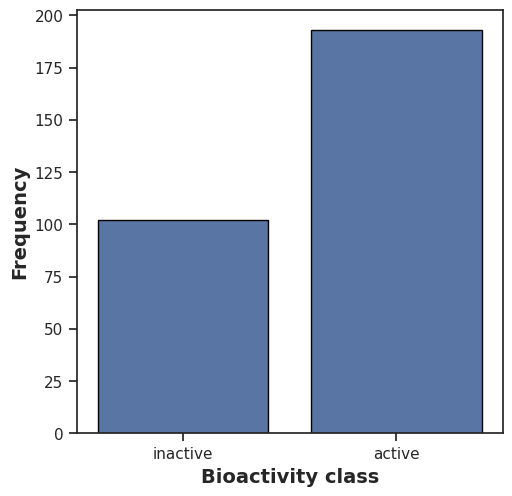

In [172]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='bioactivity_class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

Here is a frequency plot to represent the number of drug-like molecules in ChEMBL that are 'active' or 'inactive' inhibitors of MAP3K8. The number of active inhibitors is almost double the number of inactive inhibitors. This is in line with current research as kinases are crucial for cell signalling  and are commonly dysregulated in many diseases. This makes them a prominent area of interest and as a result, there is a vast number of drugs which could be repurposed for targeting dysregulated kinases in MS.

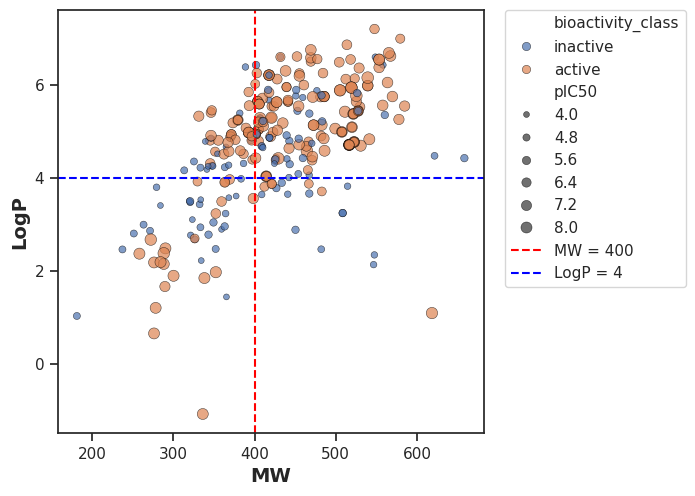

In [173]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='bioactivity_class', size='pIC50', edgecolor='black', alpha=0.7)
plt.axvline(400, color='red', linestyle='--', label='MW = 400')
plt.axhline(4, color='blue', linestyle='--', label='LogP = 4')
plt.legend()

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')


This plot indicates how the different drug-like molecules in the dataframe occupy a certain 'chemical space'. Visualising the chemical space of all of these molecules helps to identify patterns. The coloured grid represents the optimal molecular weight and LogP of the molecule for it to get past the blood brain barrier and be active in the CNS, which is highly important for drugs developed to treat neurodegenerative diseases like PPMS. Any orange point in the bottom left represents a drug-like molecule that is potent enough to be classed as an active inhibitor of MAP3K8 as well as satisfying the conditions of optimal blood brain barrier permeability. There are not many drugs in this quadrant compared to other quadrants.

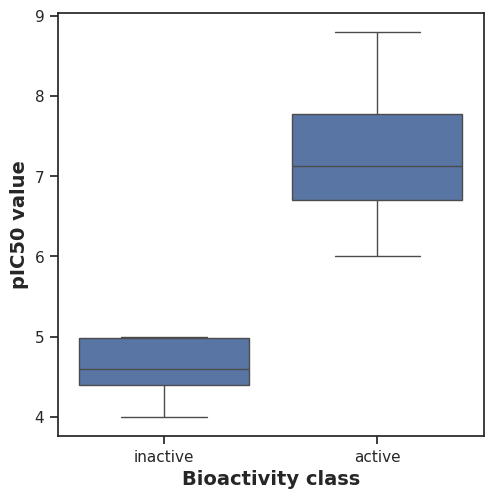

In [174]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

In [234]:
def mannwhitney(descriptor, verbose=False):

  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu


  seed(1)


  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  active = df[df.bioactivity_class == 'active']
  active = active[descriptor]

  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  inactive = df[df.bioactivity_class == 'inactive']
  inactive = inactive[descriptor]


  stat, p = mannwhitneyu(active, inactive)



  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'

  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [176]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,19686.00,0.00,0.05,Different distribution (reject H0)


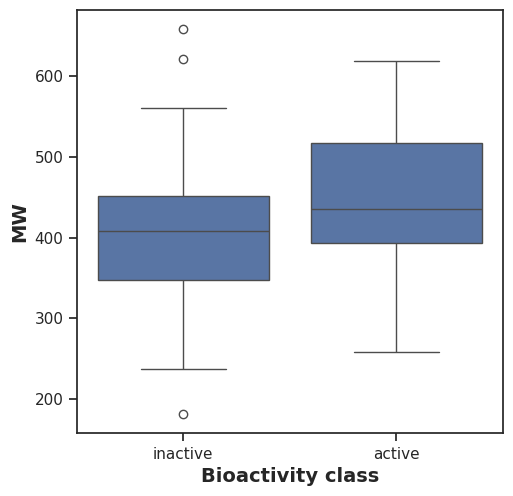

In [177]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [178]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,12620.00,0.00,0.05,Different distribution (reject H0)


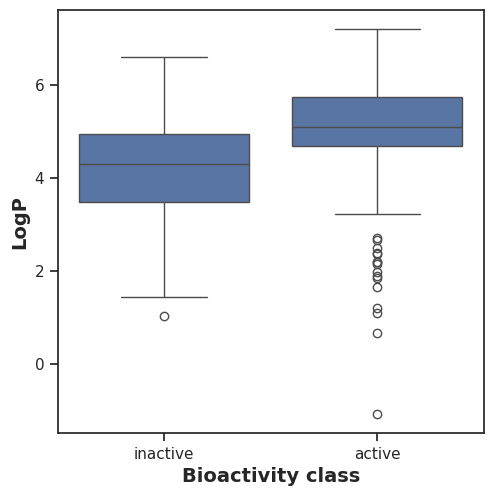

In [179]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

In [180]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,13697.50,0.00,0.05,Different distribution (reject H0)


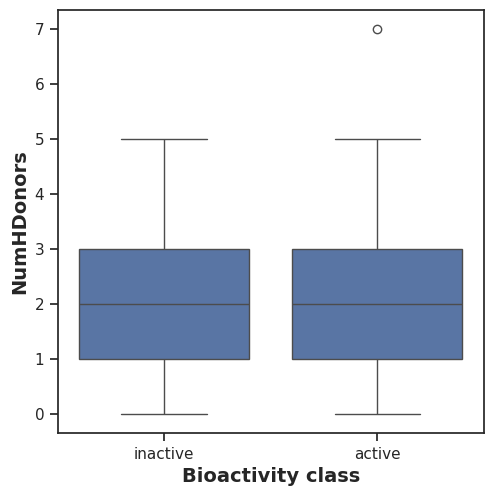

In [181]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

In [182]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,10409.00,0.39,0.05,Same distribution (fail to reject H0)


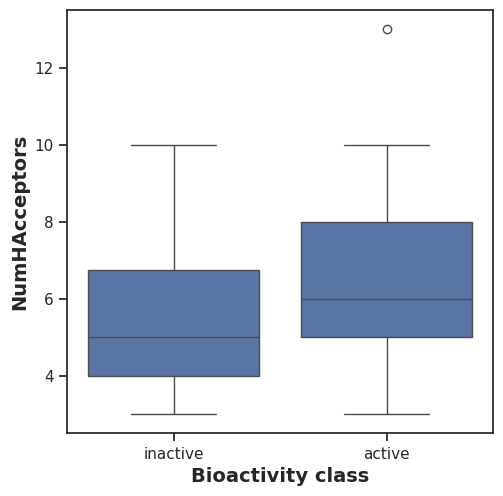

In [183]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [184]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,13300.00,0.00,0.05,Different distribution (reject H0)


All of these box plots represent a 'quantitative structure-activity relationship' analysis (QSAR). This is essentially identifying the molecular descriptor rules from the Lipinski's Rule of 5 mentioned previously that correspond with an 'active' inhibitor AKA a drug-like molecule which could be an effective inhibitor of the drug target, MAP3K8. If we see a 'reject H0' from our statistical test then we can use that as evidence to suggest that that particular descriptor can be used as a good candidate for drug discovery prediction modelling to find other 'active' drug-like molecules from some other data set. With this in mind, the only molecular descriptor to not be statistically significant was the number of hydrogen bond donors. This could be for a variety of reasons. One of which could be the small size of the data set.

This model does not directly use the Lipinski Rule of 5 molecular descriptors for the training data. It will be trained on molecular fingerprints instead.

In [185]:
! zip -r results.zip . -i *.csv *.pdf

updating: plot_NumHAcceptors.pdf (deflated 37%)
updating: mannwhitneyu_NumHAcceptors.csv (deflated 11%)
updating: plot_bioactivity_class.pdf (deflated 39%)
updating: bioactivity_preprocessed_data.csv (deflated 83%)
updating: mannwhitneyu_NumHDonors.csv (deflated 11%)
updating: mannwhitneyu_LogP.csv (deflated 8%)
updating: plot_NumHDonors.pdf (deflated 37%)
updating: plot_ic50.pdf (deflated 37%)
updating: mannwhitneyu_pIC50.csv (deflated 10%)
updating: plot_MW_vs_LogP.pdf (deflated 9%)
updating: mannwhitneyu_MW.csv (deflated 8%)
updating: plot_MW.pdf (deflated 38%)
updating: plot_LogP.pdf (deflated 38%)
updating: bioactivity_data.csv (deflated 90%)
  adding: bioactivity_data_2class_pIC50.csv (deflated 79%)
  adding: descriptors_output.csv (deflated 96%)
  adding: MAPKKK8_bioactivity_data_3class_pIC50_pubchem_fp.csv (deflated 96%)


In [186]:
import pandas as pd

In [187]:
df_2class.to_csv('bioactivity_data_2class_pIC50.csv', index=False)

In [188]:
df_2class

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
2,CHEMBL199000,N#Cc1cnc2cnc(NC3CCCC3)cc2c1Nc1ccc(F)c(Cl)c1,inactive,381.84,5.39,2.00,5.00,4.40
3,CHEMBL198647,CN(Cc1ccccc1)c1cc2c(Nc3ccc(F)c(Cl)c3)c(C#N)cnc...,inactive,417.88,5.67,1.00,5.00,4.40
4,CHEMBL196771,CC[C@H](Nc1cc2c(Nc3ccc(F)c(Cl)c3)c(C#N)cnc2cn1...,inactive,431.90,6.60,2.00,5.00,4.40
5,CHEMBL197382,CC[C@@H](Nc1cc2c(Nc3ccc(F)c(Cl)c3)c(C#N)cnc2cn...,active,431.90,6.60,2.00,5.00,6.38
6,CHEMBL199230,C[C@@H](Nc1cc2c(Nc3ccc(F)c(Cl)c3)c(C#N)cnc2cn1...,active,417.88,6.21,2.00,5.00,7.92
...,...,...,...,...,...,...,...,...
354,CHEMBL4634634,C[C@@H]1C[C@H]1C(=O)N1CCN(c2cnc(C#N)c(-c3cnn(C...,inactive,365.44,1.44,0.00,7.00,4.00
356,CHEMBL498385,Ic1ccc(Oc2cncc3sc(-c4nn[nH]n4)cc23)cc1,active,421.22,3.87,1.00,6.00,6.39
357,CHEMBL491228,NC(=O)c1ccc(-c2ccc(Oc3cncc4sc(-c5nn[nH]n5)cc34...,active,414.45,4.03,2.00,7.00,6.82
358,CHEMBL1852688,CCN1CCN(c2ccc(Nc3cc(N(C)C(=O)Nc4c(Cl)c(OC)cc(O...,inactive,560.49,5.35,2.00,8.00,5.00


In [189]:
selection = ['canonical_smiles','molecule_chembl_id']
df_2class_selection = df_2class[selection]
df_2class_selection.to_csv('molecule.smi', sep='\t', index=False, header=False)

In [190]:
cat molecule.smi | head -5

N#Cc1cnc2cnc(NC3CCCC3)cc2c1Nc1ccc(F)c(Cl)c1	CHEMBL199000
CN(Cc1ccccc1)c1cc2c(Nc3ccc(F)c(Cl)c3)c(C#N)cnc2cn1	CHEMBL198647
CC[C@H](Nc1cc2c(Nc3ccc(F)c(Cl)c3)c(C#N)cnc2cn1)c1ccccc1	CHEMBL196771
CC[C@@H](Nc1cc2c(Nc3ccc(F)c(Cl)c3)c(C#N)cnc2cn1)c1ccccc1	CHEMBL197382
C[C@@H](Nc1cc2c(Nc3ccc(F)c(Cl)c3)c(C#N)cnc2cn1)c1ccccc1	CHEMBL199230


In [191]:
cat molecule.smi | wc -l

295


In [192]:
!pip install padelpy

In [193]:
import pandas as pd
df_2class
df.to_csv("molecules.smi", sep="\t", header=False, index=False)

In [194]:
from padelpy import padeldescriptor

padeldescriptor(
    mol_dir='.',
    d_file='descriptors_output.csv',
    fingerprints=True
)

In [195]:
ls -1

bioactivity_data_2class_pIC50.csv
bioactivity_data.csv
bioactivity_preprocessed_data.csv
descriptors_output.csv
gdrive/
mannwhitneyu_LogP.csv
mannwhitneyu_MW.csv
mannwhitneyu_NumHAcceptors.csv
mannwhitneyu_NumHDonors.csv
mannwhitneyu_pIC50.csv
MAPKKK8_bioactivity_data_3class_pIC50_pubchem_fp.csv
molecule.smi
molecules.smi
plot_bioactivity_class.pdf
plot_ic50.pdf
plot_LogP.pdf
plot_MW.pdf
plot_MW_vs_LogP.pdf
plot_NumHAcceptors.pdf
plot_NumHDonors.pdf
results.zip
sample_data/


In [196]:
df_2class_X = pd.read_csv('descriptors_output.csv')

In [197]:
df_2class_X

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL199000,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL198647,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL196771,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL197382,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL199230,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290,CHEMBL4634634,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
291,CHEMBL498385,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
292,CHEMBL491228,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
293,CHEMBL1852688,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


This dataframe shows the 'PubChem fingerprints' of each drug-like molecule which can target MAP3K8. PubChem fingerprints essentially are each molecule's structure converted into 1's and 0's based on if a particular chemical structure is present in that molecule or not. For example, PubchemFP0 could be a hydroxyl group (-OH). Every molecule in the dataframe that contains a hydroxyl group would have a 1 in that column. This is the same for 881 other functional groups that Pubchem uses to characterise a particular molecule.

The Pubchem fingerprint of each molecule is what will be the X variable AKA the features which the random forest regressor will be trained on.

In [198]:
df_2class_X = df_2class_X.drop(columns=['Name'])
df_2class_X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
291,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
292,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
293,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [199]:
df_2class_Y = df_2class['pIC50']
df_2class_Y

,pIC50
2,4.40
3,4.40
4,4.40
5,6.38
6,7.92
...,...
354,4.00
356,6.39
357,6.82
358,5.00


The -log(IC50) values of each molecule will be the Y variable AKA the target that the random forest regressor is trained on. This is because the pIC50 is the best indicator of an inhibitor's potency AKA effectiveness in treating the disease.

In [200]:
dataset3 = pd.concat([df_2class_X,df_2class_Y], axis=1)
dataset3

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN
1,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN
2,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4.40
3,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4.40
4,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.00
356,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.39
357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.82
358,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.00


When combining the tables of pIC50 and molecular descriptors, many 'Not a Number' values came up for 52 molecules. This was because many of the molecules listed in the original ChEMBL database had an IC50 value but not a structure that could be used. This was a small issue as it reduced the data set on which to train the model.

In [201]:
dataset3.to_csv('MAPKKK8_bioactivity_data_3class_pIC50_pubchem_fp.csv', index=False)

In [202]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [203]:
df = pd.read_csv('MAPKKK8_bioactivity_data_3class_pIC50_pubchem_fp.csv')

In [204]:
df

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN
1,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN
2,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4.40
3,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4.40
4,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.00
343,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.39
344,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.82
345,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.00


In [205]:
X = df.drop('pIC50', axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
343,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
344,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
345,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [206]:
X = X.dropna()
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
291,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
292,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
293,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [207]:
Y = df.pIC50
Y

,pIC50
0,NaN
1,NaN
2,4.40
3,4.40
4,4.40
...,...
342,4.00
343,6.39
344,6.82
345,5.00


In [208]:
X.shape

(295, 881)

In [209]:
Y.shape

(347,)

In [210]:
feature_cols = [col for col in df.columns if col.startswith("PubchemFP")]

In [211]:
df = df.dropna(subset=feature_cols, how='all')

In [212]:
df = df.dropna(subset=['pIC50'])

In [213]:
X = df[feature_cols]
Y = df['pIC50']

In [214]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))
X = selection.fit_transform(X)
X = pd.DataFrame(X)

In [215]:
X.shape


(243, 142)

In [216]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [217]:
X_train.shape, Y_train.shape

((194, 142), (194,))

In [218]:
X_test.shape, Y_test.shape

((49, 142), (49,))

In [219]:
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

-0.0673299191952752

At this point, I used a standard random forest train test split set up from my previous project. This gave me an R^2 value of -0.067. This means that my model in it's current iteration was worse at predicting the target value than just taking the mean of the target value and using that as the average value (Target value is -log(IC50)). The model fails to capture variance - essentially it predicts a value that is very far off from the true value.

In [220]:
Y_pred = model.predict(X_test)

<function matplotlib.pyplot.show(close=None, block=None)>

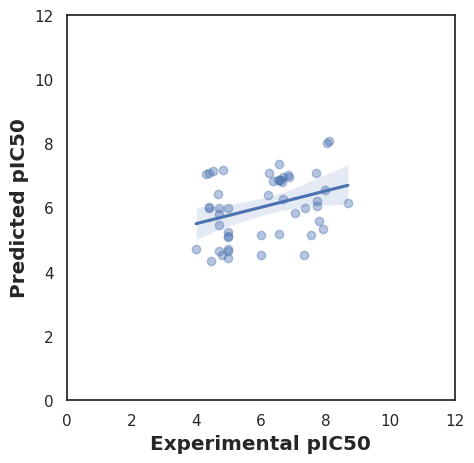

In [221]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show

In [222]:
%pip install lazypredict

In [223]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor

In [224]:
df = pd.read_csv('MAPKKK8_bioactivity_data_3class_pIC50_pubchem_fp.csv')

In [225]:
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

  0%|          | 0/42 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000678 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 426
[LightGBM] [Info] Number of data points in the train set: 194, number of used features: 142
[LightGBM] [Info] Start training from score 6.345655
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

  0%|          | 0/42 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000381 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 426
[LightGBM] [Info] Number of data points in the train set: 194, number of used features: 142
[LightGBM] [Info] Start training from score 6.345655
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

In [226]:
Y = Y.dropna()

In [227]:
X.shape

(243, 142)

In [228]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))
X = selection.fit_transform(X)
X.shape

(243, 142)

In [229]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [230]:
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

  0%|          | 0/42 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000311 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 426
[LightGBM] [Info] Number of data points in the train set: 194, number of used features: 142
[LightGBM] [Info] Start training from score 6.295491
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

  0%|          | 0/42 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000381 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 426
[LightGBM] [Info] Number of data points in the train set: 194, number of used features: 142
[LightGBM] [Info] Start training from score 6.295491
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

In [231]:
predictions_train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
ExtraTreeRegressor,0.28,0.81,0.63,0.02
DecisionTreeRegressor,0.28,0.81,0.63,0.03
ExtraTreesRegressor,0.28,0.81,0.63,0.43
GaussianProcessRegressor,0.28,0.81,0.63,0.03
XGBRegressor,0.28,0.81,0.63,0.17
RandomForestRegressor,0.07,0.75,0.72,0.45
BaggingRegressor,0.04,0.75,0.73,0.07
GradientBoostingRegressor,-0.03,0.73,0.76,0.22
MLPRegressor,-0.03,0.73,0.76,0.38


In [232]:
predictions_test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
Lars,74103729540029171328669187661142843407970624857...,-1451198036825571337815395343423728987849198097...,1784675763899436222341414891453731197377576960.00,0.10
KernelRidge,10.24,-17.09,6.30,0.03
GaussianProcessRegressor,5.95,-8.69,4.61,0.03
RANSACRegressor,2.06,-1.08,2.14,0.63
LinearRegression,1.84,-0.65,1.90,0.07
TransformedTargetRegressor,1.84,-0.65,1.90,0.03
PassiveAggressiveRegressor,1.75,-0.47,1.80,0.02
LinearSVR,1.74,-0.45,1.78,0.14
HuberRegressor,1.72,-0.42,1.76,0.07


[(0.0, 1.0)]

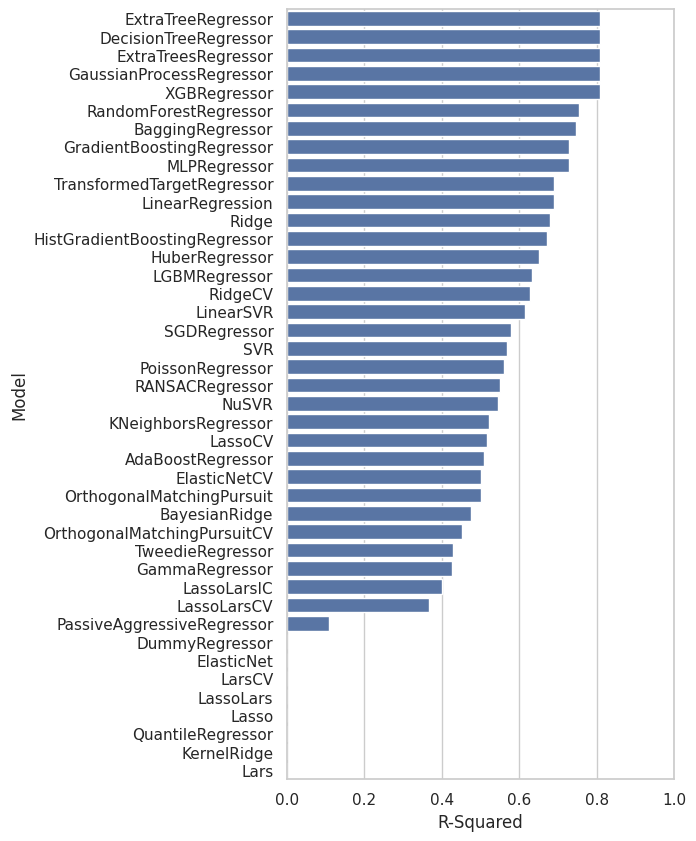

In [233]:
import matplotlib.pyplot as plt
import seaborn as sns



plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="R-Squared", data=predictions_train)
ax.set(xlim=(0, 1))

Instead, the tool LazyRegressor was used. This compared multiple different types of prediction models to see which one gave the best R^2 value. For reference, an R^2 value of 1 would mean the model predicted the pIC50 values of molecules perfectly. ExtraTreeRegressor saw an R^2 value of around 0.81. This is promising but it does not always mean that ExtraTreeRegressor will predict that well on a completely new data set of drug-like molecules that act on MAP3K8.

In conclusion, this was an interesting exercise in using Python bioinformatics tools to potentially create an effective machine learning tool. This model could definitely be optimised. If, in a future iteration of this project, I used ExtraTreeRegressor to predict the effectiveness of drug-like molecules to inhibit MAP3K8 from a different data set then I could tune the hyperparameters by assessing the best max_depth or max_leaf_nodes to get the best R^2 value.